In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
from PIL import Image

image_files = os.listdir('/kaggle/input/benetech-making-graphs-accessible/train/images/')
dir = '/kaggle/input/benetech-making-graphs-accessible/train/images/'
# read image in a numpy, merge into one larege array, (# of images, size)
#
#

sorted_image_files = sorted(image_files)

images = []
image_file_names = []

for i in sorted_image_files:
    image = Image.open(dir + i)
    image = image.convert('L')
    image = image.resize((28, 28)) 
    images.append(np.asarray(image))
    image_file_names.append(os.path.splitext(i)[0])

images = np.array(images)
        

#images = np.concatenate(images)   

images.shape

#read in image, convert to numpy array, resize imamge via pillow to common size (resize), convert to grey scale

(60578, 28, 28)

In [2]:
import json
import os

json_files = os.listdir('/kaggle/input/benetech-making-graphs-accessible/train/annotations/')
dir_json = '/kaggle/input/benetech-making-graphs-accessible/train/annotations/'

sorted_json_files = sorted(json_files)
chart_class = []


#for j in sorted_json_files:
#    with open(dir_json + j, 'r') as file:
#        json_data = json.load(file)
#        chart_type = json_data['chart-type']
#        chart_class.append(chart_type)


for file_name in image_file_names:
    with open(dir_json + file_name + '.json', 'r') as file:
        json_data = json.load(file)
        chart_type = json_data['chart-type']
        chart_class.append(chart_type)

print(chart_class)



['vertical_bar', 'line', 'line', 'scatter', 'line', 'scatter', 'dot', 'dot', 'line', 'line', 'line', 'line', 'vertical_bar', 'line', 'vertical_bar', 'line', 'line', 'vertical_bar', 'dot', 'line', 'line', 'line', 'scatter', 'line', 'line', 'vertical_bar', 'line', 'vertical_bar', 'vertical_bar', 'line', 'dot', 'line', 'vertical_bar', 'vertical_bar', 'vertical_bar', 'scatter', 'vertical_bar', 'dot', 'line', 'line', 'scatter', 'dot', 'line', 'vertical_bar', 'line', 'scatter', 'vertical_bar', 'line', 'scatter', 'line', 'line', 'vertical_bar', 'line', 'vertical_bar', 'line', 'line', 'vertical_bar', 'line', 'line', 'line', 'vertical_bar', 'vertical_bar', 'line', 'line', 'vertical_bar', 'scatter', 'vertical_bar', 'vertical_bar', 'scatter', 'scatter', 'vertical_bar', 'vertical_bar', 'line', 'line', 'line', 'dot', 'line', 'vertical_bar', 'dot', 'line', 'vertical_bar', 'line', 'dot', 'vertical_bar', 'scatter', 'scatter', 'vertical_bar', 'vertical_bar', 'vertical_bar', 'scatter', 'line', 'dot', 's

In [3]:
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [15]:
#split into traing and testing, 20%

X = images / 255.0
y = LabelEncoder().fit_transform(chart_class)
#y = chart_class

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


DefaultConv2D = partial(tf.keras.layers.Conv2D,
                       kernel_size = 3,
                       padding = 'same',
                       activation = 'relu',
                       kernel_initializer = 'he_normal')


model = tf.keras.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape = [28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 256),
    DefaultConv2D(filters = 256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64,  activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])



In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])

In [17]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10
1515/1515 [==============================] - 15s 8ms/step - loss: 0.6252 - accuracy: 0.7518 - val_loss: 0.2779 - val_accuracy: 0.9128
Epoch 2/10
1515/1515 [==============================] - 11s 7ms/step - loss: 0.2096 - accuracy: 0.9341 - val_loss: 0.1169 - val_accuracy: 0.9614
Epoch 3/10
1515/1515 [==============================] - 12s 8ms/step - loss: 0.1369 - accuracy: 0.9589 - val_loss: 0.0812 - val_accuracy: 0.9723
Epoch 4/10
1515/1515 [==============================] - 11s 7ms/step - loss: 0.1135 - accuracy: 0.9663 - val_loss: 0.0854 - val_accuracy: 0.9772
Epoch 5/10
1515/1515 [==============================] - 11s 7ms/step - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.0748 - val_accuracy: 0.9777
Epoch 6/10
1515/1515 [==============================] - 11s 7ms/step - loss: 0.0799 - accuracy: 0.9771 - val_loss: 0.0581 - val_accuracy: 0.9815
Epoch 7/10
1515/1515 [==============================] - 11s 7ms/step - loss: 0.0735 - accuracy: 0.9790 - val_loss: 0.0597 - val_ac

In [18]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 256)        

<AxesSubplot:>

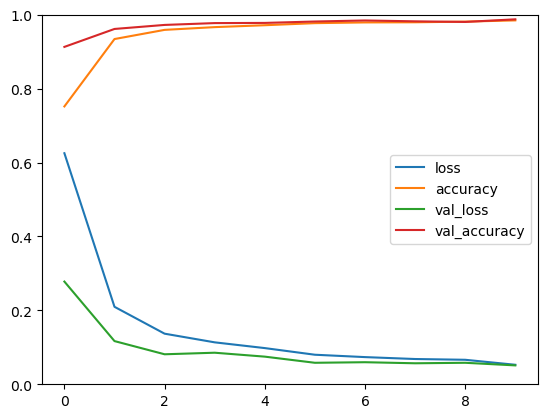

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(ylim = [0,1])

In [20]:
model.evaluate(X_test, y_test)

379/379 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9871


[0.0482817143201828, 0.9871244430541992]

Write a two-paragraph summary of your model and results below.  Specifically, you should address the following:

**The architecture of your model**

Our model is a deep convolutional neural network (CNN) built using TensorFlow Keras, inspired by the "Hands-On Machine Learning" textbook example. The architecture consists of the following layers:

Input layer: A Conv2D layer with 64 filters, kernel size of 7, and input shape of [28, 28, 1].
Max Pooling layers.
Conv2D layers with 128 filters.
Conv2D layers with 256 filters.
Flatten Layer.
Dense Layer: 128 units, ReLU Activation.
Dropout layers separating dense layers.
Dense Layers: 64 units, ReLU Activation.
Output Layer: Dense Layers with 10 units and SoftMax Activation for multiclass classification.


All Conv2D layers have the same padding, activation, and kernel_initializer settings, defined in the DefaultConv2D function.

--------------------------------------------------

**hyperparameter values (optimizer, learning rate, activation function, etc.)**

The hyperparameter values used for the model include an Adam optimizer with a learning rate of 0.001. The Adam optimizer uses a variable learning rate for each parameter during training, leading to faster convergence and improved performance. The learning rate of 0.001 was chosen as a default value for the optimizer; this value could be experimented with to further refine and optimize the model to find the best fit. For the model, we chose a ReLU activation function for all Conv2D and Dense layers due to its simplicity and speed at which the model can fit to the data. For the output layer's activation function, we chose the softmax activation function because of its ability for multiclass classification. Softmax outputs probabilities where the sum will equal 1, allowing for easy interpretability in which class the model is predicting the input image to be. To measure loss, we utilized the sparse_categorical_crossentropy as the loss function. This loss function works well with multiclass classification problems where a softmax output function is used. Other metrics we used were accuracy, which takes the ratio of correctly classified instances to the total number of instances. 

--------------------------------------------------

**training (how many epochs, runtime, etc.)**

For this model, we ran three tests, each having a different number of epochs ranging from 5, 10, 15. After the three tests, we found that having 10 epochs was an ample amount that reached convergence but did not overfit the model. The result was roughly a 0.985 accuracy with less than 0.05 loss.

Utilizing the Kaggle external GPU T4 x2, each epoch was able to run in roughly 12 seconds, leading to a total compute time of 2 minutes. Possible ways to reduce this runtime would be to make the CNN simpler, with the trade-off being accuracy; however, there may be methods to simplify the model without losing performance.

The training and validation (X_val, y_val) were used to evaluate the model's performance during training while still using a 20% testing split. The main thing we watched for within the training set was the loss and accuracy where the performance on the validation dataset was degrading while the training performance was still improving, which would be a sign of overfitting.

--------------------------------------------------


**performance on your validation set**

The model achieved an accuracy of approximately 98.71% on the test dataset. The loss was about 0.0483. This suggests that the model is able to generalize well and can accurately classify graph types given an image of a graph. To further improve the model, we might look at making the model simpler while keeping similar accuracy levels, taking a look at computational power, increasing computational speed, as well as looking into different learning rates. We could also gather the misclassifications and try to see if there are any common characteristics that would possibly lead to the misclassification



